In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('city_day.csv')


In [3]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
data.drop(["AQI_Bucket"],axis=1,inplace=True)


In [5]:
data.drop(["City"],axis=1,inplace=True)

In [6]:
data.drop(["Date"],axis=1,inplace=True)


In [7]:
data.drop(["Benzene"],axis=1,inplace=True)


In [8]:
data.drop(["Xylene"],axis=1,inplace=True)


In [9]:
data = data[data['AQI'].notna()]


In [10]:
data = data[data['PM10'].notna()]


In [11]:
data = data[data['NOx'].notna()]


In [12]:
data = data[data['NH3'].notna()]


In [13]:
data.drop(["Toluene"],axis=1,inplace=True)


In [14]:
data.shape


(14765, 10)

In [15]:
data.head()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
2010,31.21,38.66,7.20,1.27,10.65,25.63,0.56,4.22,2.81,52.0
2011,38.39,46.68,7.19,0.91,10.37,29.16,0.57,4.46,0.18,60.0
2012,43.23,50.83,7.14,1.07,10.48,28.95,0.57,4.53,0.41,62.0
2013,33.82,41.03,7.09,0.36,9.73,28.41,0.48,4.63,0.30,70.0
2014,27.14,35.04,5.63,2.32,8.09,23.98,0.50,4.71,13.02,54.0


In [16]:
data = data.reset_index(drop=True)


In [17]:
data = data.fillna(data.mean())


In [18]:
X = data.iloc[:,:9]


In [19]:
Y = data.iloc[:, -1]


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [21]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(16,16),activation='relu',solver='adam',max_iter=300)

In [22]:
model.fit(X_train, Y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(16, 16), max_iter=300)

In [23]:
Y_pred = model.predict(X_test)


In [24]:
print('Model Accuracy: ', model.score(X_test,Y_test)*100)

Model Accuracy:  90.08047875014165


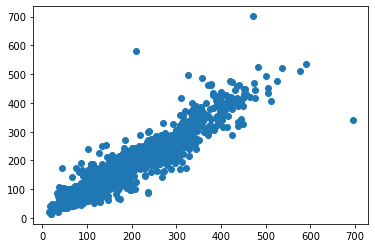

In [25]:
plt.scatter(Y_test, Y_pred)
plt.xlabel = 'Air Quality Index'
plt.ylabel = 'Predicted Air Quality Index'
plt.title = 'Air Quality Index Vs Predicted Air Quality Index'
plt.show()

In [26]:
y = np.array(Y_test)
y_p = np.array(Y_pred)
df = pd.DataFrame({"test": y, "predictions": y_p})
df.head(100)

,test,predictions
0,77.0,89.644784
1,174.0,188.142238
2,370.0,355.722509
3,86.0,92.076048
4,53.0,68.092425
...,...,...
95,303.0,293.287252
96,164.0,129.930928
97,118.0,119.340495
98,166.0,163.013639


<img src="aqi.png" width=300 height=200